In [ ]:
import numpy as np
from sklearn import datasets
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

lr = 10 ** -6

Neural Network individual components:

In [ ]:
# matrix multiplication XW

class matrix_multiplication_layer:
  def __init__(self, neurons_count, features_count):
    self. X = np.array([])
    self.W = np.array([[0 for j in range(neurons_count)] for i in range(features_count)])

  def forward_pass(self, X):
    self.X = X
    # N = XW
    N = np.dot(self.X, self.W)
    return N

  def backward_pass(self, dL_dN):
    #dL_dW
    dL_dW = np.dot(self.X.T, dL_dN)
    self.W = self.W - (lr * dL_dW)

    #dL_dX
    dL_dX = np.dot(dL_dN, self.W.T)
    return dL_dX

In [ ]:
# bias addition layer

class bias_addition_layer:
  def __init__(self, neurons_count):
    self.N = np.array([])
    self.B = np.array([0 for i in range(neurons_count)])

  def forward_pass(self, N):
    self.N = N
    Z = self.N + self.B
    return Z

  def backward_pass(self, dL_dZ):
    #dL_dB
    dL_dB = dL_dZ.sum(axis = 0) # column wise summation
    self.B = self.B - (lr * dL_dB)

    #dL_dN
    dL_dN = dL_dZ
    return dL_dN

In [ ]:
#mean squared loss

class mse_layer:
  def __init__(self):
    self.P = np.array([]) # predicted values
    self.Y = np.array([]) # actual values

  def forward_pass(self, P, Y):
    self.P = P
    self.Y = Y
    mse = np.dot((self.P - self.Y).T, self.P - self.Y)
    return mse

  def backward_pass(self):
    dL_dP = self.P - self.Y
    return dL_dP

In [ ]:
# softmax layer

class softmax_layer:
  def __init__(self):
    self.Z = np.array([])
    self.softmax = np.array([])

  def forward_pass(self, Z):
    self.Z = Z
    self.softmax = np.exp(Z)
    row_sum_of_exponentials = np.array([[i] for i in self.softmax.sum(axis = 1)])
    self.softmax = self.softmax / row_sum_of_exponentials
    return self.softmax

  def backward_pass(self, dL_dSoftmax):
    dL_dZ = []
    for i in range(len(dL_dSoftmax)):
        cols = len(self.Z[0])
        A = np.zeros([cols, cols])
        S = self.softmax

        for j in range(cols):
            for k in range(cols):
                if j == k:
                    A[j][k] = S[i][j]*(1-S[i][k])
                else:
                    A[j][k] = -S[i][j]*S[i][k]
                    
        dL_dZ.append(np.dot(dL_dSoftmax[i], A))
    return np.array(dL_dZ)

In [ ]:
# sigmoid layer

class sigmoid_layer:
  def __init__(self):
    self.Z = np.array([]) # Z = N + B
    self.sigmoid = np.array([])

  def forward_pass(self, Z):
    self.Z = Z
    self.sigmoid = np.exp(-1 * Z)
    self.sigmoid = 1 / 1 + self.sigmoid
    return self.sigmoid

  def backward_pass(self, dL_dSigmoid):
    #Z = N + B
    dL_dZ = self.sigmoid * (1 - self.sigmoid) * dL_dSigmoid
    return dL_dZ

In [ ]:
# cross entropy loss layer

class cross_entropy_loss_layer:
  def __init__(self):
    self.P = np.array([]) #predictions
    self.Y = np.array([]) #actual labels

  def forward_pass(self, P, Y):
    self.P = P
    self.Y = Y
    # finding loss for each row and then adding the lossed of all the rows
    cross_entropy_loss = (-1 * Y * np.log(P)).sum(axis = 1).sum(axis = 0)
    return np.array([[cross_entropy_loss]])

  def backward_pass(self):
    #dL_dP
    dL_dP = -self.Y / self.P
    return dL_dP

# Q2
##### Using the sklearn.load boston() function, obtain boston house pricing dataset. Train a regression model using the operations implemented above. You need to write a stochastic gradient descent function to train.

In [ ]:
# loading the dataset
X, Y = load_boston(return_X_y = True) #return_X_y: If set to True, returns (data, target)

In [ ]:
def stochastic_gradient_descent(X, Y, lr, num_of_iterations):
  Y= np.array([[i] for i in Y])
  loss_values = []

  #defining the model
  layer1 = matrix_multiplication_layer(1, len(X[0]))
  layer2 = bias_addition_layer(1)
  layer3 = mse_layer()

  def model_forward_pass(curr_training_input, curr_training_label):
    # forward pass in model
      N = layer1.forward_pass(curr_training_input) #N = XW
      P = layer2.forward_pass(N) #P = N + B where P is the model prediction
      L = layer3.forward_pass(P, curr_training_label)
      return P, L

  # training the model
  for iter in range(num_of_iterations):
    for j in range(len(X)): # taking each sample one by one
      curr_training_input = np.array([X[j]])
      curr_training_label = Y[j]

      model_forward_pass(curr_training_input, curr_training_label)

      #backward pass in model and updating the weights and bias along the way
      dL_dP = layer3.backward_pass()
      dL_dN = layer2.backward_pass(dL_dP)
      dL_dX = layer1.backward_pass(dL_dN)
    
    #calculating the overall loss after updation of weights
    _, L = model_forward_pass(X, Y)
    loss_values.append(L[0][0])

    if iter % (num_of_iterations / 20) == 0:
      print("Current iteration =", iter)
  print("Training done.")

  return loss_values

Current iteration = 0
Current iteration = 100
Current iteration = 200
Current iteration = 300
Current iteration = 400
Current iteration = 500
Current iteration = 600
Current iteration = 700
Current iteration = 800
Current iteration = 900
Current iteration = 1000
Current iteration = 1100
Current iteration = 1200
Current iteration = 1300
Current iteration = 1400
Current iteration = 1500
Current iteration = 1600
Current iteration = 1700
Current iteration = 1800
Current iteration = 1900
Training done.


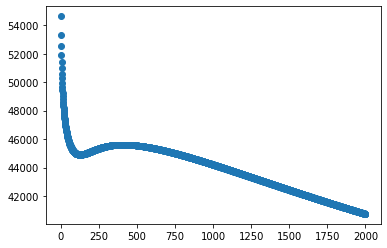

In [ ]:
loss_values = stochastic_gradient_descent(X, Y, 0.01, 2000)
plt.scatter(range(len(loss_values)),loss_values)
plt.show()

# Q3
##### Load the iris dataset in sklearn. This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray. Using the operations implemented above create a multi-class classifier (Cross entropy loss + soft max)

In [ ]:
# loading dataset
X_iris, Y_iris = datasets.load_iris(return_X_y=True) #(training data, label)

num_of_labels = 3 # Setosa, Versicolour, and Virginica
# one hot encoding on true labels
y = np.zeros((len(X_iris), num_of_labels))
for i in range(len(X_iris)):
  y[i][Y_iris[i]] = 1
Y_iris = y

In [ ]:
def full_batch_gradient_descent(X, Y, lr, num_of_iterations):
  loss_values = [] # to store loss values after each iteration

  #defining the model
  layer1 = matrix_multiplication_layer(num_of_labels, len(X[0]))
  layer2 = bias_addition_layer(num_of_labels)
  layer3 = softmax_layer()
  layer4 = cross_entropy_loss_layer()

  def model_forward_pass():
    # forward pass of model and returns the predictions and the loss value
    N = layer1.forward_pass(X)
    Z = layer2.forward_pass(N)
    P = layer3.forward_pass(Z)
    L = layer4.forward_pass(P, Y)
    return P, L # returns prediction and loss

  def model_backward_pass():
    # updating weights and biases
    dL_dP = layer4.backward_pass()
    dL_dZ = layer3.backward_pass(dL_dP)
    dL_dN = layer2.backward_pass(dL_dZ)
    dL_dX = layer1.backward_pass(dL_dN)

  for iter in range(num_of_iterations):
    model_forward_pass()
    model_backward_pass()
    predictions, loss = model_forward_pass() #forward pass after updation of weights and biases
    loss_values.append(loss)

    if iter % (num_of_iterations / 20) == 0:
      print("current iteration =", iter)

  #forward pass of model after all the iterations are done
  final_predictions, final_loss = model_forward_pass()

  # computing model accuracy
  correct_predictions = 0
  for i in range(len(final_predictions)):
    index_of_predicted_value = np.argmax(final_predictions[i])
    if Y[i][index_of_predicted_value] == 1:
      correct_predictions += 1

  print("Final accuracy of the model =", correct_predictions / len(final_predictions))
  return loss_values

current iteration = 0
current iteration = 500
current iteration = 1000
current iteration = 1500
current iteration = 2000
current iteration = 2500
current iteration = 3000
current iteration = 3500
current iteration = 4000
current iteration = 4500
current iteration = 5000
current iteration = 5500
current iteration = 6000
current iteration = 6500
current iteration = 7000
current iteration = 7500
current iteration = 8000
current iteration = 8500
current iteration = 9000
current iteration = 9500
Final accuracy of the model = 0.7066666666666667


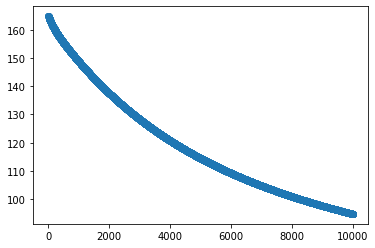

In [ ]:
loss_values = full_batch_gradient_descent(X_iris, Y_iris, 0.01, 10000)
plt.scatter(range(len(loss_values)),loss_values)
plt.show()